<a href="https://colab.research.google.com/github/poluslavik13/innopolis/blob/main/%D0%94%D0%97_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 10 Python A/B В этом задании вам необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

Описание задачи:

Сеть коммерческих автозаправочных станций реализует широкий набор смежных товаров в дополнение к топливу. К таким товарам относится фаст-фуд, прохладительные напитки и кофе, охдаждающая жидкость, сувениры и т.д. Согласно текущему положению дел, 30 порцентов водителей покупают что-то дополнительно из указанного перечня. Для повышения спроса на эти категории товара было решено внедрить систему кешбека (возврата части денежных средств на карту) на указанные виды продукции. Система покажет себя удачно, если хотя-бы 70 процентов водителей будут приобретать хотя-бы один товар из представленной номенклатуры.

Описание гипотезы:

Hо: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) процент покупок до внедрения кешбека (а) и после (b). Уровень доверия установим 95%. Поэтому α = 0,05.

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

Как итог, нам нужна 95% уверенность в том, что введенная система кешбека позволит увеличить количество водителей, которые купят смежный товар из каталога, до 70%, прежде чем отклонить нулевую гипотезу Ho.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ad.csv')
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


В представленном наборе данных:

A - покупатели смежного товара до внедрения системы кешбека;

B - покупатели соответствующего товара после внедрения кешбека.

Предприянтое действие:

0 - дополнительный товар не был приобретен;

1 - дополнительный товар был преобретен.

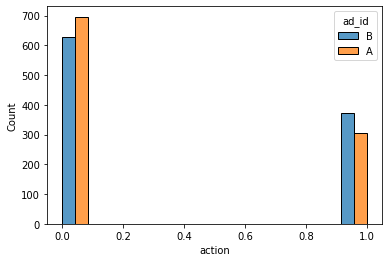

In [ ]:
# посмотрим распределение данных на гистограмме:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

In [ ]:
# Посмотрим теперь сколько покупок дополнительных товаров было до и после внедрения системы кешбека:
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') 
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)) 
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0)) #

In [ ]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Количество покупок с системой кешбека (B) больше, чем без нее (A).

Text(0, 0.5, 'Покупки')

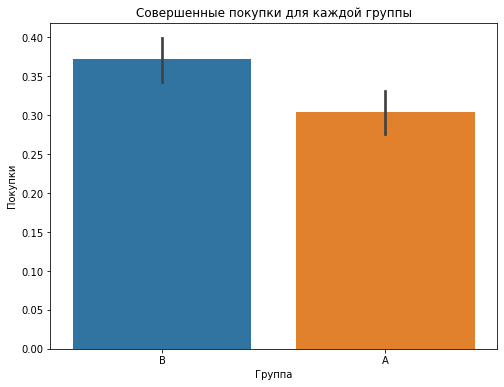

In [ ]:
# Рассмотрим это на гистограмме
plt.figure(figsize=(8,6))
sns.barplot(x=df['ad_id'], y=df['action'])
plt.title('Совершенные покупки для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Покупки')

**Проверим гипотезу.**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = df[df['ad_id'] == 'A']['action'] # Покупки до внедрения кешбека
test_results = df[df['ad_id'] == 'B']['action'] # Покупки после внедрения кешбека

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Считаем кол-во элементов в каждой группе:
nobs = [control_results.count(), test_results.count()]
#Считаем кол-во оплат в каждой группе:
successes = [control_results.sum(), test_results.sum()]
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — т.е. согласимся, что 5% наших наблюдений будут ошибочными.

In [ ]:
alpha = 0.05
print(pval < alpha)

True


In [ ]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)
print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


**Вывод:**

Использование системы кешбека на заправках за покупку смежных товаров увеличило количество покупателей этих самых товаров на 10% (до 40,2%). Но изначально ставилась задача увеличить кол-во покупок до 70% для достижения значимой выгоды для сети заправок. Соответственно, можно сделать вывод, что внедрение системы кешбека не оправдало затраченных на нее средств.